<a href="https://colab.research.google.com/github/YazGonzalezHerrera/Ecuaciones-Diferenciales-Parciales-2/blob/main/Diferencias%20progresivas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DIFERENCIAS PROGRESIVAS

Use los siguientes tamaños de paso para aproximar la solución de la ecuación del calor:

\frac{\partial u}{\partial t}(x,t) - \frac{\partial^2u}{\partial x^2}(x,t) = 0

Con condiciones de frontera u(0,t) = u(1,t) = 0, 0<t

Y condiciones iniciales u(x,0) = sen(πx), 0≤x≤1


a) h=0.1 y k=0.0005

b) h=0.1 y k=0.01

Compare los resultados en t = 0.5 con la solución exacta:

\u(x,t) = e^{- \pi^2t} \cdot sen(\pi x)

SOLUCIÓN DE LA ECUACIÓN DEL CALOR USANDO EL MÉTODO DE DIFERENCIAS PROGRESIVAS
Caso A (k pequeño): h = 0.1, k = 0.0005

Tabla comparativa (t = 0.5):
+-----+------------+----------+--------------+
|   x |   Numérico |   Exacto |   Error Abs. |
+=====+============+==========+==============+
| 0   |   0        | 0        |     0        |
+-----+------------+----------+--------------+
| 0.2 |   0.004349 | 0.004227 |     0.000122 |
+-----+------------+----------+--------------+
| 0.4 |   0.007037 | 0.00684  |     0.000197 |
+-----+------------+----------+--------------+
| 0.6 |   0.007037 | 0.00684  |     0.000197 |
+-----+------------+----------+--------------+
| 0.8 |   0.004349 | 0.004227 |     0.000122 |
+-----+------------+----------+--------------+
| 1   |   0        | 0        |     0        |
+-----+------------+----------+--------------+
Caso B (k grande): h = 0.1, k = 0.01
ADVERTENCIA: r = 1.000000 > 0.5, el método puede ser inestable

Tabla comparativa (t = 0.5):
+-----+----------

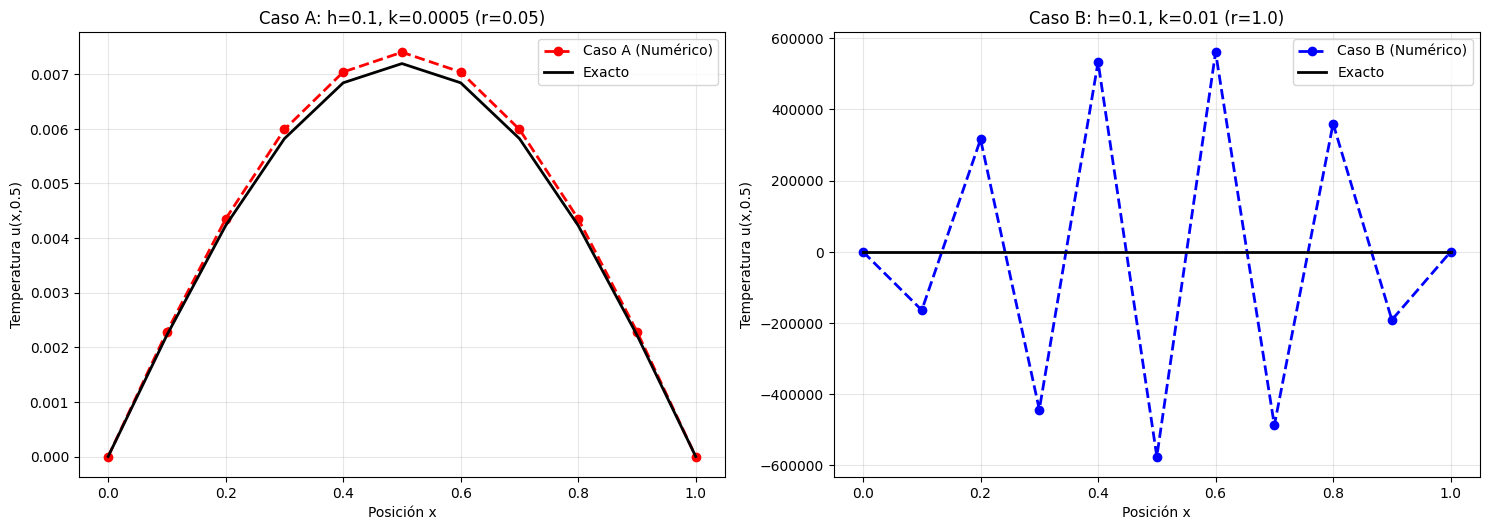

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

def solucion_exacta(x, t):
    # Calcula la solución exacta de la ecuación del calor
    # u(x,t) = e^(-π²t) * sin(πx)

    return np.exp(-np.pi**2 * t) * np.sin(np.pi * x)

def resolver_ecuacion_calor(h, k, t_final=0.5):
    # Resuelve la ecuación del calor usando el método de diferencias progresivas

    L = 1.0  # Longitud del dominio espacial
    x = np.arange(0, L + h, h)  # Puntos espaciales
    Nx = len(x)  # Número de puntos espaciales

    # Número de pasos temporales
    Nt = int(t_final / k) + 1

    # Condición de estabilidad (para referencia)
    r = k / (h**2)

    # Verificar condición de estabilidad (r <= 0.5 para diferencias progresivas)
    if r > 0.5:
        print(f"ADVERTENCIA: r = {r:.6f} > 0.5, el método puede ser inestable")

    # Condición inicial
    u = np.sin(np.pi * x)

    # Matriz para almacenar la solución
    U = np.zeros((Nt, Nx))
    U[0, :] = u

    # Iteración temporal
    for n in range(0, Nt-1):
        u_nuevo = u.copy()

        # Aplicar el esquema diferencias progresivas para puntos internos
        for i in range(1, Nx-1):
            u_nuevo[i] = u[i] + r * (u[i+1] - 2*u[i] + u[i-1])

        # Condiciones de frontera
        u_nuevo[0] = 0.0
        u_nuevo[-1] = 0.0

        u = u_nuevo.copy()
        U[n+1, :] = u

    # Solución exacta en t_final
    u_exacto = solucion_exacta(x, t_final)

    return x, U[-1, :], u_exacto, r

def calcular_error(u_numerico, u_exacto):
    # Calcula diferentes medidas de error

    error_absoluto = np.abs(u_numerico - u_exacto)
    error_relativo = np.abs(u_numerico - u_exacto) / (np.abs(u_exacto) + 1e-10)
    error_maximo = np.max(error_absoluto)
    error_rms = np.sqrt(np.mean(error_absoluto**2))

    return error_absoluto, error_relativo, error_maximo, error_rms

def main():
    # Función principal que ejecuta las simulaciones y genera resultados

    print("SOLUCIÓN DE LA ECUACIÓN DEL CALOR USANDO EL MÉTODO DE DIFERENCIAS PROGRESIVAS")

    # Parámetros para los dos casos
    casos = [
        {"h": 0.1, "k": 0.0005, "nombre": "Caso A (k pequeño)"},
        {"h": 0.1, "k": 0.01, "nombre": "Caso B (k grande)"}
    ]

    resultados = []

    for caso in casos:
        print(f"{caso['nombre']}: h = {caso['h']}, k = {caso['k']}")

        # Resolver la ecuación
        x, u_numerico, u_exacto, r = resolver_ecuacion_calor(caso['h'], caso['k'])

        # Calcular errores
        error_abs, error_rel, error_max, error_rms = calcular_error(u_numerico, u_exacto)

        # Almacenar resultados
        resultados.append({
            'nombre': caso['nombre'],
            'x': x,
            'u_numerico': u_numerico,
            'u_exacto': u_exacto,
            'error_abs': error_abs,
            'error_max': error_max,
            'error_rms': error_rms,
            'r': r
        })

        # Mostrar tabla comparativa
        tabla_comparativa = []
        for i in range(len(x)):
            if i % 2 == 0:  # Mostrar cada segundo punto para mayor claridad
                tabla_comparativa.append([
                    f"{x[i]:.1f}",
                    f"{u_numerico[i]:.6f}",
                    f"{u_exacto[i]:.6f}",
                    f"{error_abs[i]:.6f}"
                ])

        print("\nTabla comparativa (t = 0.5):")
        print(tabulate(tabla_comparativa,
                      headers=['x', 'Numérico', 'Exacto', 'Error Abs.', 'Error Rel.'],
                      tablefmt='grid'))

    # Gráficas comparativas
    plt.figure(figsize=(15, 10))

    # Gráfica 3: Comparación lado a lado
    plt.subplot(2, 2, 3)
    plt.plot(resultados[0]['x'], resultados[0]['u_numerico'], 'ro--',
             linewidth=2, markersize=6, label='Caso A (Numérico)')
    plt.plot(resultados[0]['x'], resultados[0]['u_exacto'], 'k-',
             linewidth=2, label='Exacto')
    plt.xlabel('Posición x')
    plt.ylabel('Temperatura u(x,0.5)')
    plt.title('Caso A: h=0.1, k=0.0005 (r=0.05)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)
    plt.plot(resultados[1]['x'], resultados[1]['u_numerico'], 'bo--',
             linewidth=2, markersize=6, label='Caso B (Numérico)')
    plt.plot(resultados[1]['x'], resultados[1]['u_exacto'], 'k-',
             linewidth=2, label='Exacto')
    plt.xlabel('Posición x')
    plt.ylabel('Temperatura u(x,0.5)')
    plt.title('Caso B: h=0.1, k=0.01 (r=1.0)')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()

Para concluir podemos decir que el método en el primer caso (a) es bastante certero y se acerca a la solución exacta dado que el parámetro k es lo suficientemente pequeño para que el método no entre en inestabilidad, a diferencia del caso (b) donde la solución númerica se aleja de la solución real.